In [1]:
import datetime
from dateutil import parser

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
import pylab
import copy
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import cross_validation, datasets, grid_search
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn import tree, ensemble, linear_model, cross_validation
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler 

%matplotlib inline

In [2]:
##Import data
df = pd.read_csv('movie_metadata.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [15]:
##Find out the proportion of missing data per column
for i in df.columns:
    print i, float((df[i].isnull().sum()))/len(df)

color 0.0
director_name 0.0
num_critic_for_reviews 0.0
duration 0.0
director_facebook_likes 0.0
actor_3_facebook_likes 0.0
actor_2_name 0.0
actor_1_facebook_likes 0.0
gross 0.0
genres 0.0
actor_1_name 0.0
movie_title 0.0
num_voted_users 0.0
cast_total_facebook_likes 0.0
actor_3_name 0.0
facenumber_in_poster 0.0
plot_keywords 0.0
movie_imdb_link 0.0
num_user_for_reviews 0.0
language 0.0
country 0.0
content_rating 0.0
budget 0.0
title_year 0.0
actor_2_facebook_likes 0.0
imdb_score 0.0
aspect_ratio 0.0
movie_facebook_likes 0.0


In [14]:
##Impute missing gross values
df["gross"] = df["gross"].fillna(df["gross"].median())
df = df.dropna()

4138

In [16]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4138.000000,4138.000000,4138.000000,4138.000000,4138.000000,4.138000e+03,4.138000e+03,4138.000000,4138.000000,4138.000000,4.138000e+03,4138.000000,4138.000000,4138.000000,4138.000000,4138.000000
mean,158.576124,109.848236,790.923151,725.674722,7317.233929,5.011152e+07,9.899414e+04,10866.608265,1.359111,318.275979,4.276710e+07,2001.610681,1887.158531,6.459739,2.110346,8722.354277
std,122.227545,22.706952,3023.476422,1812.058990,15138.852333,6.745045e+07,1.477317e+05,18607.417430,2.018189,399.524121,2.156316e+08,12.366119,4364.521746,1.084861,0.514989,20741.291452
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.620000e+02,2.800000e+01,0.000000,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,69.000000,95.000000,10.000000,174.250000,699.250000,1.030138e+07,1.620225e+04,1752.000000,0.000000,99.000000,8.000000e+06,1998.000000,346.250000,5.900000,1.850000,0.000000
50%,129.000000,106.000000,59.000000,415.000000,1000.000000,2.551750e+07,4.744050e+04,3679.000000,1.000000,195.000000,2.100000e+07,2004.000000,652.000000,6.600000,2.350000,210.500000
75%,216.000000,120.000000,231.500000,670.000000,12000.000000,6.106718e+07,1.175075e+05,15512.000000,2.000000,378.000000,4.800000e+07,2010.000000,962.000000,7.200000,2.350000,10000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [8]:
df.sort_values(by="gross", ascending = False)[:5]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


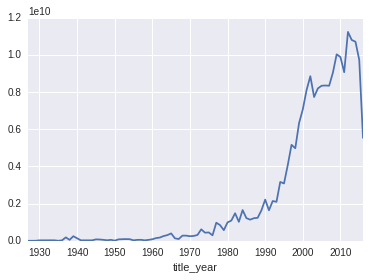

In [17]:
##See the trend of how gross grows
df.groupby(['title_year'])['gross'].sum().plot();

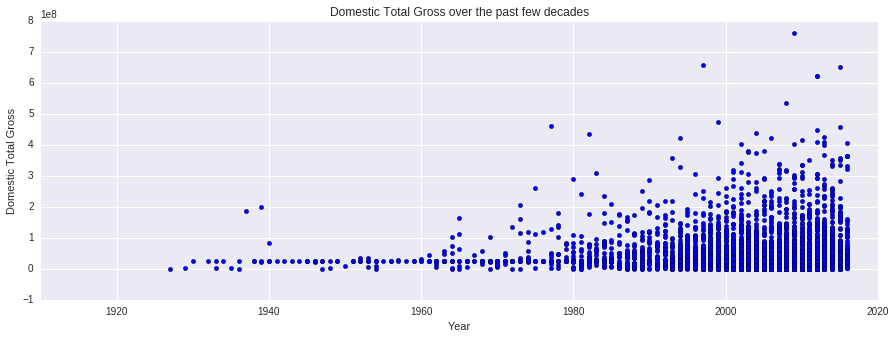

In [23]:
x = np.array(df['title_year'])
y = np.array(df["gross"])
fig = plt.figure(dpi=600, figsize=(15,5))
axes = fig.add_subplot(111)
pylab.xlim([1910,2020])
axes.scatter(x,y)
axes.set_ylabel("Domestic Total Gross")
axes.set_xlabel("Year")
axes.set_title("Domestic Total Gross over the past few decades");

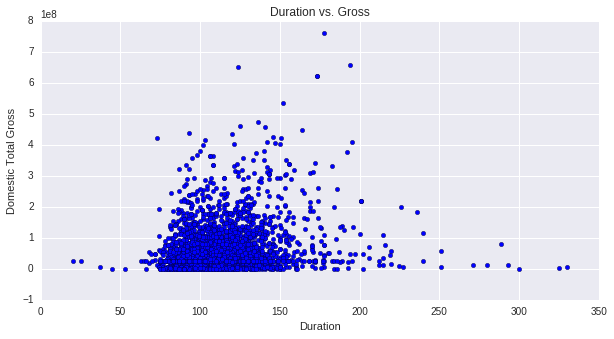

In [24]:
y = np.array(df['gross'])
x = np.array(df['duration'])
fig = plt.figure(dpi=600, figsize=(10,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("Domestic Total Gross")
axes.set_xlabel("Duration")
axes.set_title("Duration vs. Gross");

In [25]:
#highest average IMDB score per director
df.groupby('director_name')['imdb_score'].mean().sort_values(ascending = False)[:10]

director_name
Akira Kurosawa       8.700
Sadyk Sher-Niyaz     8.700
Charles Chaplin      8.600
Tony Kaye            8.600
Majid Majidi         8.500
Ron Fricke           8.500
Damien Chazelle      8.500
Sergio Leone         8.475
Christopher Nolan    8.425
Moustapha Akkad      8.400
Name: imdb_score, dtype: float64

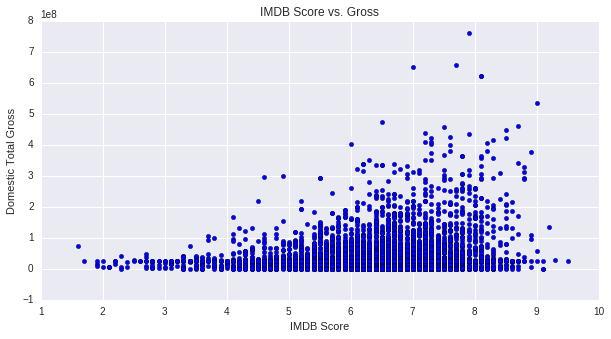

In [19]:
y = np.array(df['gross'])
x = np.array(df['imdb_score'])
fig = plt.figure(dpi=600, figsize=(10,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("Domestic Total Gross")
axes.set_xlabel("IMDB Score")
axes.set_title("IMDB Score vs. Gross");

In [21]:
#add the return on investment in the data
df["Profit Ratio"]= df["gross"]/df["budget"]

In [37]:
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.221465,0.169156,0.260417,0.177949,0.469901,0.603131,0.249777,-0.029291,0.577801,0.111716,0.377952,0.265051,0.335129,0.105870,0.697051
duration,0.221465,1.000000,0.172534,0.124182,0.082009,0.238483,0.330508,0.118046,0.028043,0.341102,0.068667,-0.122221,0.128456,0.363938,0.090127,0.206937
director_facebook_likes,0.169156,0.172534,1.000000,0.114273,0.091773,0.134829,0.291047,0.118705,-0.042905,0.211591,0.018240,-0.054793,0.113111,0.185116,0.013261,0.157160
actor_3_facebook_likes,0.260417,0.124182,0.114273,1.000000,0.255162,0.305795,0.273327,0.489272,0.105412,0.212391,0.043873,0.120517,0.556077,0.060252,0.029384,0.274893
actor_1_facebook_likes,0.177949,0.082009,0.091773,0.255162,1.000000,0.150152,0.186417,0.946353,0.058106,0.131448,0.020919,0.114145,0.392026,0.086191,0.038709,0.134141
gross,0.469901,0.238483,0.134829,0.305795,0.150152,1.000000,0.625452,0.242050,-0.027373,0.547444,0.104548,0.081753,0.260389,0.199701,0.041957,0.370393
num_voted_users,0.603131,0.330508,0.291047,0.273327,0.186417,0.625452,1.000000,0.256739,-0.028219,0.785443,0.071749,0.050676,0.253164,0.462297,0.047829,0.523904
cast_total_facebook_likes,0.249777,0.118046,0.118705,0.489272,0.946353,0.242050,0.256739,1.000000,0.081445,0.189362,0.034044,0.144928,0.640692,0.098289,0.046247,0.209541
facenumber_in_poster,-0.029291,0.028043,-0.042905,0.105412,0.058106,-0.027373,-0.028219,0.081445,1.000000,-0.074022,-0.019250,0.056064,0.074718,-0.065256,0.010363,0.014270
num_user_for_reviews,0.577801,0.341102,0.211591,0.212391,0.131448,0.547444,0.785443,0.189362,-0.074022,1.000000,0.076068,0.043928,0.197123,0.320407,0.052552,0.380178


In [38]:
#Introduce dummy variables to the data set
def multi_genre(genre):
    if "|" in genre:
        return 1
    else:
        return 0
def action(action):
    if "Action" in action:
        return 1
    else:
        return 0

def adventure(adventure):
    if 'Adventure' in adventure:
        return 1
    else:
        return 0 

def scifi(scifi):
    if "Sci-Fi" in scifi:
        return 1
    else:
        return 0

def drama(drama):
    if "Drama" in drama:
        return 1
    else:
        return 0
    
def comedy(comedy):
    if "Comedy" in comedy:
        return 1
    else:
        return 0
    
def horror(horror):
    if "Horror" in horror:
        return 1
    else:
        return 0

def fantasy(fantasy):
    if "Fantasy" in fantasy:
        return 1
    else:
        return 0
    
def western(western):
    if "Western" in western:
        return 1
    else:
        return 0
    
def romance(romance):
    if "Romance" in romance:
        return 1
    else:
        return 0
    
def documentary(documentary):
    if "Documentary" in documentary:
        return 1
    else:
        return 0
    
def crime(crime):
    if "Crime" in crime:
        return 1
    else:
        return 0

In [43]:
df['Action'] = df["genres"].apply(action)
df['Adventure'] = df["genres"].apply(adventure)
df['Sci-Fi'] = df["genres"].apply(scifi)
df['Comedy'] = df["genres"].apply(comedy)
df['Horror'] = df["genres"].apply(horror)
df['Fantasy'] = df["genres"].apply(fantasy)
df['Drama'] = df["genres"].apply(drama)
df['Western'] = df["genres"].apply(western)
df['Documentary'] = df["genres"].apply(documentary)
df['Crime'] = df["genres"].apply(crime)
df['Romance'] = df["genres"].apply(romance)
df['multi-genre'] = df["genres"].apply(multi_genre)

list_genres = ["gross","imdb_score",'multi-genre',"Action", "Adventure", "Sci-Fi", "Comedy", "Horror", "Fantasy", "Drama", "Western", "Documentary", "Crime", "Romance"]

In [45]:
df2 = df[list_genres]
df2.corr()

,gross,imdb_score,multi-genre,Action,Adventure,Sci-Fi,Comedy,Horror,Fantasy,Drama,Western,Documentary,Crime,Romance
gross,1.000000,0.199701,0.087959,0.203861,0.340510,0.162234,-0.002836,-0.090631,0.191210,-0.195102,-0.021981,-0.048816,-0.082355,-0.048129
imdb_score,0.199701,1.000000,0.030500,-0.104531,-0.005921,-0.065345,-0.195372,-0.187049,-0.064853,0.311802,0.049134,0.055205,0.037118,0.003007
multi-genre,0.087959,0.030500,1.000000,0.177442,0.162207,0.127068,0.002357,-0.027963,0.128242,0.073876,-0.007658,-0.063216,0.156272,0.177718
Action,0.203861,-0.104531,0.177442,1.000000,0.311889,0.283657,-0.183129,-0.071201,0.040782,-0.264655,0.029088,-0.057565,0.150182,-0.190486
Adventure,0.340510,-0.005921,0.162207,0.311889,1.000000,0.232633,-0.032983,-0.119044,0.267649,-0.259143,0.039150,-0.049149,-0.171984,-0.125239
Sci-Fi,0.162234,-0.065345,0.127068,0.283657,0.232633,1.000000,-0.097097,0.101933,0.016279,-0.233138,-0.044543,-0.042637,-0.144902,-0.138034
Comedy,-0.002836,-0.195372,0.002357,-0.183129,-0.032983,-0.097097,1.000000,-0.166340,0.038347,-0.254067,-0.057572,-0.042407,-0.075190,0.176785
Horror,-0.090631,-0.187049,-0.027963,-0.071201,-0.119044,0.101933,-0.166340,1.000000,0.093715,-0.239619,-0.050059,-0.038872,-0.123400,-0.170235
Fantasy,0.191210,-0.064853,0.128242,0.040782,0.267649,0.016279,0.038347,0.093715,1.000000,-0.205436,-0.043956,-0.042236,-0.159436,-0.043319
Drama,-0.195102,0.311802,0.073876,-0.264655,-0.259143,-0.233138,-0.254067,-0.239619,-0.205436,1.000000,0.018482,-0.072956,0.055393,0.173748


In [46]:
df['genres'].value_counts()

Drama                                                               158
Comedy|Drama|Romance                                                156
Comedy                                                              151
Comedy|Drama                                                        145
Comedy|Romance                                                      134
Drama|Romance                                                       124
Crime|Drama|Thriller                                                 88
Action|Crime|Thriller                                                62
Horror                                                               57
Action|Crime|Drama|Thriller                                          56
Drama|Thriller                                                       50
Action|Adventure|Sci-Fi                                              50
Comedy|Crime                                                         47
Action|Adventure|Thriller                                       

In [47]:
df['director_name'].value_counts().mean(), df["director_name"].value_counts().median()

(2.233135456017269, 1.0)

In [49]:
df['actor_1_name'].value_counts().mean(), df["actor_1_name"].value_counts().median()

(2.549599507085644, 1.0)

In [50]:
df['actor_2_name'].value_counts().mean(), df['actor_2_name'].value_counts().median()

(1.7070957095709571, 1.0)

In [51]:
df['actor_3_name'].value_counts().mean(), df["actor_3_name"].value_counts().median()

(1.448372418620931, 1.0)

In [54]:
actor_profit = df.sort_values(by=["gross"],ascending = False).groupby("actor_1_name").head()
df.groupby("actor_1_name")['gross'].sum().sort_values(ascending = False)[:50]

actor_1_name
Johnny Depp               3.714789e+09
Harrison Ford             3.442591e+09
Tom Hanks                 3.264559e+09
Tom Cruise                2.987622e+09
J.K. Simmons              2.856407e+09
Will Smith                2.762618e+09
Chris Hemsworth           2.729133e+09
Leonardo DiCaprio         2.640582e+09
Robert Downey Jr.         2.456990e+09
Jennifer Lawrence         2.367856e+09
Robin Williams            2.296964e+09
Robert De Niro            2.253850e+09
Steve Buscemi             2.048904e+09
Bruce Willis              2.036460e+09
Denzel Washington         1.896762e+09
Matt Damon                1.854631e+09
Robert Pattinson          1.841497e+09
Morgan Freeman            1.831550e+09
Hugh Jackman              1.713314e+09
Liam Neeson               1.705568e+09
Bradley Cooper            1.658315e+09
Natalie Portman           1.645480e+09
Scarlett Johansson        1.612165e+09
Christian Bale            1.580306e+09
Nicolas Cage              1.533706e+09
Dwayne Johns

In [44]:
df["imdb_score"].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

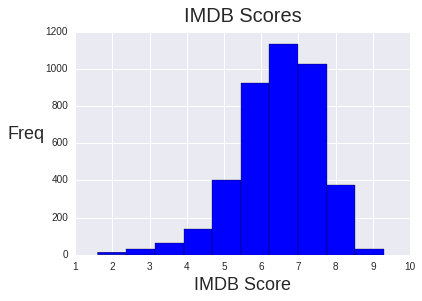

In [57]:
df['imdb_score'].hist(bins = 10, color = "blue")
plt.title("IMDB Scores", fontsize = 20, y= 1.02)
plt.xlabel("IMDB Score", fontsize = 18)
plt.ylabel("Freq", fontsize = 18, labelpad = 20).set_rotation(0)
plt.show()

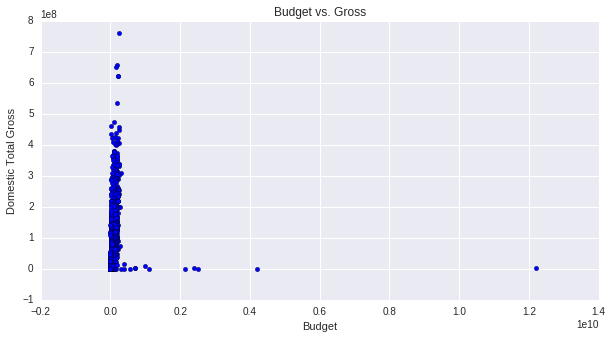

In [58]:
y = np.array(df['gross'])
x = np.array(df['budget'])
fig = plt.figure(dpi=600, figsize=(10,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("Domestic Total Gross")
axes.set_xlabel("Budget")
axes.set_title("Budget vs. Gross");

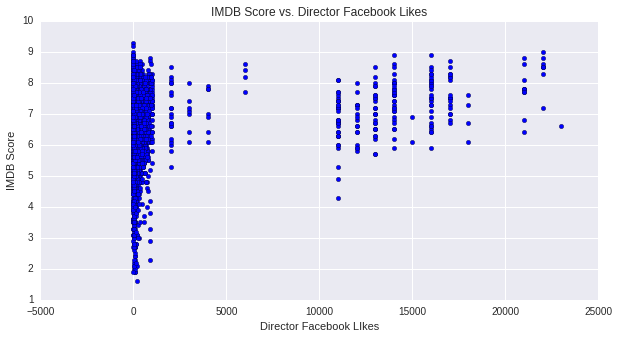

In [60]:
y = np.array(df['imdb_score'])
x = np.array(df['director_facebook_likes'])
fig = plt.figure(dpi=600, figsize=(10,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("IMDB Score")
axes.set_xlabel("Director Facebook LIkes")
axes.set_title("IMDB Score vs. Director Facebook Likes");

In [62]:
df['budget'].describe()

count    4.138000e+03
mean     4.276710e+07
std      2.156316e+08
min      2.180000e+02
25%      8.000000e+06
50%      2.100000e+07
75%      4.800000e+07
max      1.221550e+10
Name: budget, dtype: float64

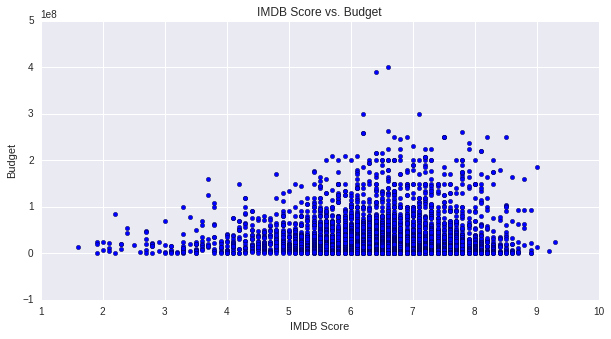

In [64]:
#Take care of outlier
df = df[df.budget < 500000000]
y = np.array(df['budget'])
x = np.array(df['imdb_score'])
fig = plt.figure(dpi=600, figsize=(10,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("Budget")
axes.set_xlabel("IMDB Score")
axes.set_title("IMDB Score vs. Budget");

In [66]:
df['country'].value_counts()

USA               3242
UK                 361
France             113
Germany             86
Canada              83
Australia           46
Spain               24
Italy               16
Japan               14
China               14
Hong Kong           13
New Zealand         13
Denmark              8
South Korea          7
Mexico               7
Ireland              7
India                6
Norway               6
Brazil               6
South Africa         5
Thailand             4
Iran                 4
Russia               4
Netherlands          4
Czech Republic       3
Argentina            3
West Germany         2
Romania              2
Taiwan               2
Peru                 1
Indonesia            1
Soviet Union         1
Aruba                1
Kyrgyzstan           1
New Line             1
Afghanistan          1
Official site        1
Iceland              1
Libya                1
Israel               1
Hungary              1
Belgium              1
Finland              1
Sweden     

In [67]:
usa = df[df.country == "USA"] #only focusing on America. Takes care of currency differences
usa.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes', u'Action',
       u'Adventure', u'Sci-Fi', u'Comedy', u'Horror', u'Fantasy', u'Drama',
       u'Western', u'Documentary', u'Crime', u'Romance', u'multi-genre'],
      dtype='object')

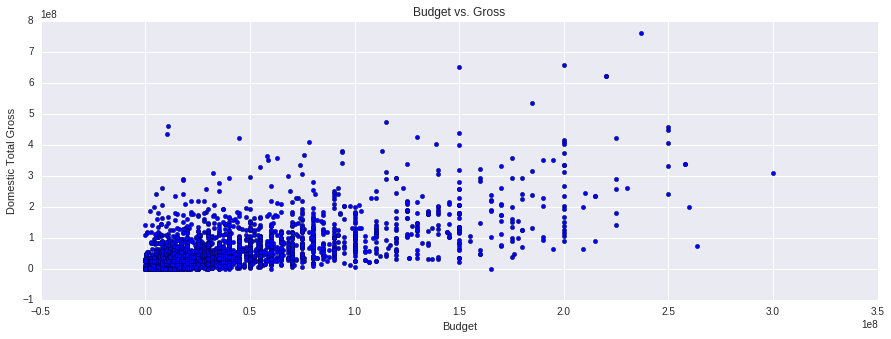

In [69]:
y = np.array(usa['gross'])
x = np.array(usa['budget'])
fig = plt.figure(dpi=600, figsize=(15,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("Domestic Total Gross")
axes.set_xlabel("Budget")
axes.set_title("Budget vs. Gross");

In [70]:
usa.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,Sci-Fi,Comedy,Horror,Fantasy,Drama,Western,Documentary,Crime,Romance,multi-genre
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3.242000e+03,3.242000e+03,3242.000000,3242.000000,3242.000000,...,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,159.005861,109.281925,919.869833,804.014806,7943.603023,5.602651e+07,1.043258e+05,11876.259408,1.401295,326.195250,...,0.135102,0.407773,0.115052,0.138495,0.479025,0.019124,0.011721,0.184762,0.227946,0.895743
std,123.475432,22.228514,3334.747588,1942.490215,16487.834973,7.073128e+07,1.549837e+05,20098.405728,2.110706,402.752005,...,0.341885,0.491496,0.319134,0.345472,0.499637,0.136982,0.107645,0.388165,0.419572,0.305640
min,1.000000,20.000000,0.000000,0.000000,0.000000,7.030000e+02,2.800000e+01,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,95.000000,11.000000,220.000000,775.750000,1.400630e+07,1.731350e+04,2066.250000,0.000000,104.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,129.000000,105.000000,63.000000,458.000000,1000.000000,3.146210e+07,5.058800e+04,4263.500000,1.000000,201.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,216.000000,119.000000,241.000000,707.500000,13000.000000,7.088930e+07,1.253920e+05,16273.750000,2.000000,387.750000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,4667.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
print 'genres', 'actors'
len(usa['genres'].value_counts()), len(usa["actor_1_name"].value_counts())+len(usa["actor_2_name"].value_counts())+len(usa["actor_3_name"].value_counts())

genres actors


(688, 5455)

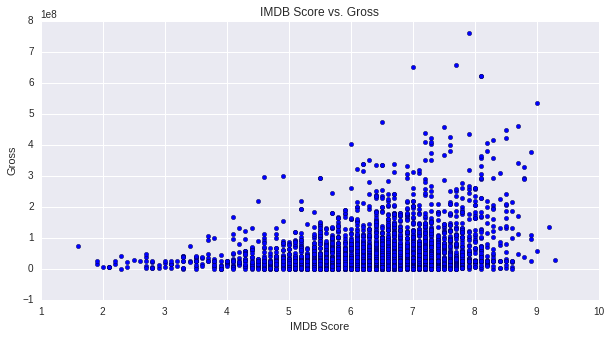

In [74]:
y = np.array(usa['gross'])
x = np.array(usa['imdb_score'])
fig = plt.figure(dpi=600, figsize=(10,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("Gross")
axes.set_xlabel("IMDB Score")
axes.set_title("IMDB Score vs. Gross");

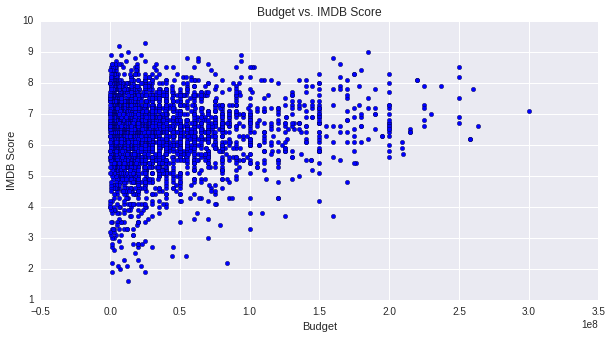

In [78]:
y = np.array(usa['imdb_score'])
x = np.array(usa['budget'])
fig = plt.figure(dpi=600, figsize=(10,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("IMDB Score")
axes.set_xlabel("Budget")
axes.set_title("Budget vs. IMDB Score");

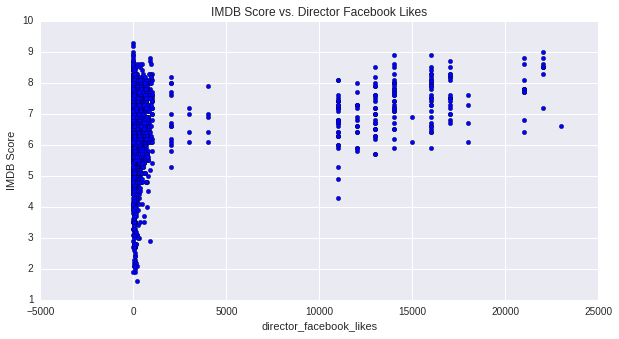

In [79]:
y = np.array(usa['imdb_score'])
x = np.array(usa['director_facebook_likes'])
fig = plt.figure(dpi=600, figsize=(10,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("IMDB Score")
axes.set_xlabel("director_facebook_likes")
axes.set_title("IMDB Score vs. Director Facebook Likes");

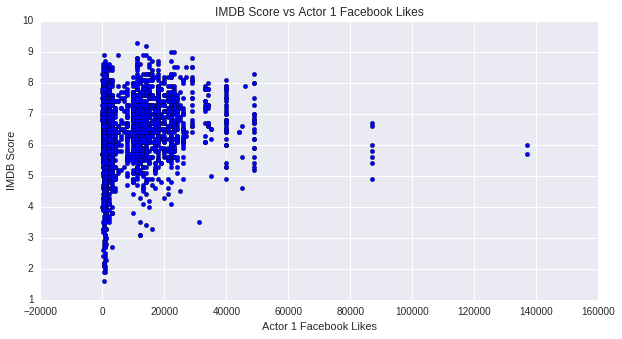

In [80]:
#Takes care of single outlier
usa = usa[usa.actor_1_facebook_likes<150000]
y = np.array(usa['imdb_score'])
x = np.array(usa['actor_1_facebook_likes'])
fig = plt.figure(dpi=600, figsize=(10,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("IMDB Score")
axes.set_xlabel("Actor 1 Facebook Likes")
axes.set_title("IMDB Score vs Actor 1 Facebook Likes");

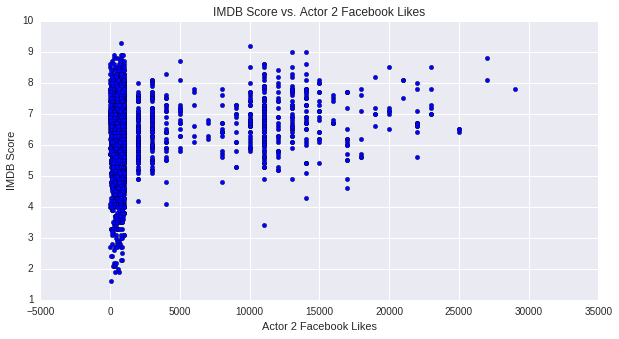

In [82]:
usa = usa[usa.actor_2_facebook_likes<120000]
y = np.array(usa['imdb_score'])
x = np.array(usa['actor_2_facebook_likes'])
fig = plt.figure(dpi=600, figsize=(10,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("IMDB Score")
axes.set_xlabel("Actor 2 Facebook Likes")
axes.set_title("IMDB Score vs. Actor 2 Facebook Likes");

In [83]:
usa.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,Sci-Fi,Comedy,Horror,Fantasy,Drama,Western,Documentary,Crime,Romance,multi-genre
count,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3.238000e+03,3.238000e+03,3238.000000,3238.000000,3238.000000,...,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000
mean,159.037369,109.297406,920.834157,802.062693,7574.169549,5.604130e+07,1.043406e+05,11460.371834,1.400556,326.251081,...,0.135269,0.407659,0.114577,0.138666,0.479308,0.019148,0.011736,0.184991,0.228227,0.896232
std,123.514409,22.234717,3336.692697,1940.634237,10675.151140,7.076414e+07,1.550350e+05,14905.987451,2.110588,402.934498,...,0.342063,0.491475,0.318560,0.345651,0.499649,0.137065,0.107710,0.388350,0.419755,0.305006
min,1.000000,20.000000,0.000000,0.000000,0.000000,7.030000e+02,2.800000e+01,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,95.000000,11.000000,219.250000,775.000000,1.400630e+07,1.731350e+04,2062.000000,0.000000,104.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,129.000000,105.000000,63.000000,458.000000,1000.000000,3.146210e+07,5.058800e+04,4256.000000,1.000000,201.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,216.000000,119.000000,241.000000,706.000000,13000.000000,7.088930e+07,1.253920e+05,16236.500000,2.000000,387.750000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,813.000000,330.000000,23000.000000,23000.000000,137000.000000,7.605058e+08,1.689764e+06,140268.000000,43.000000,4667.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


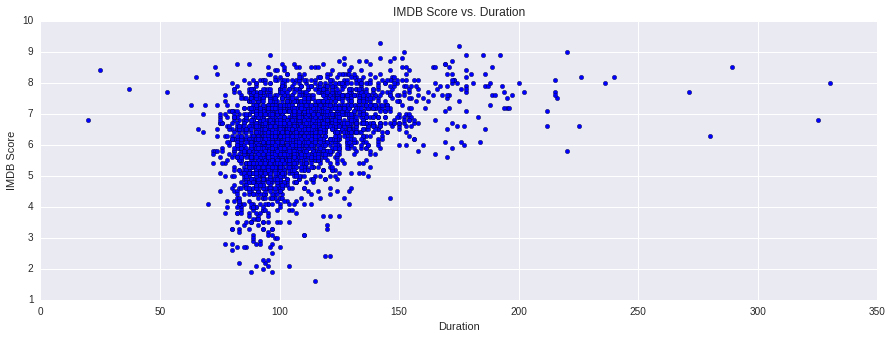

In [86]:
y = np.array(usa['imdb_score'])
x = np.array(usa['duration'])
fig = plt.figure(dpi=600, figsize=(15,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("IMDB Score")
axes.set_xlabel("Duration")
axes.set_title("IMDB Score vs. Duration");

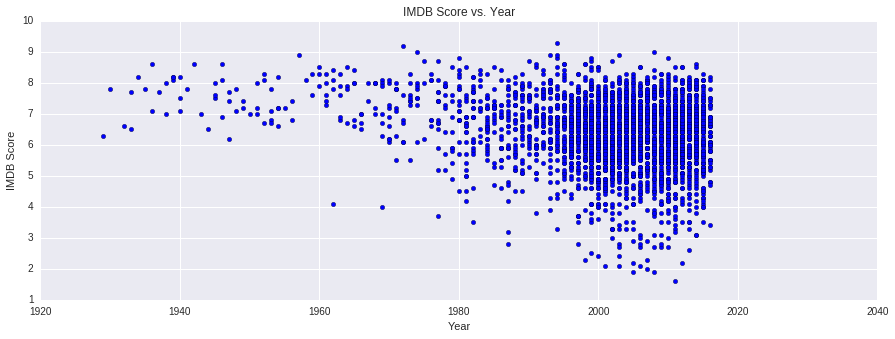

In [87]:
y = np.array(usa['imdb_score'])
x = np.array(usa['title_year'])
fig = plt.figure(dpi=600, figsize=(15,5))
axes = fig.add_subplot(111)
axes.scatter(x,y)
axes.set_ylabel("IMDB Score")
axes.set_xlabel("Year")
axes.set_title("IMDB Score vs. Year");

## Some feature engineering. I hypothesize that directors with more movies generally have high ratings because production companies wouldn't give the job to untalented directors. I will split the director variable into 3 groups. The top 5 percent, then the next 35 percent, then the bottom 60 percent

In [93]:
#top 5 and next 35 percent values
print usa["director_name"].value_counts().quantile(.6), usa["director_name"].value_counts().quantile(.95)

2.0 6.0


In [94]:
director = pd.DataFrame(usa["director_name"].value_counts())

In [99]:
top5 = director[director["director_name"]>6]
director35 = director[director["director_name"]>= 2]
director35 = director35[director35["director_name"]<6]
director_bottom = director[director["director_name"]<2]

In [101]:
def top_5(name):
    if name in top5.index:
        return 1
    else:
        return 0

def top_40(name):
    if name in director35.index:
        return 1
    else:
        return 0

def bottom(name):
    if name in director_bottom.index:
        return 1
    else:
        return 0

In [102]:
usa["top_5_directors"] = usa["director_name"].apply(top_5)
usa["medium_directors"] = usa["director_name"].apply(top_40)
usa["director_bottom"] = usa["director_name"].apply(bottom)
usa = usa.drop(["top_5_directors", "medium_directors", "director_bottom"],axis = 1)

In [107]:
## Create dummies for content rating. Trying to see if this affects the result
rating_dummy = pd.get_dummies(usa["content_rating"])
director_dummy = pd.get_dummies(usa["director_name"])
usa2 = pd.concat([usa, rating_dummy], axis = 1)
usa2.columns
usa3 = usa2[['duration', 'director_facebook_likes', 
            'actor_3_facebook_likes', 'actor_1_facebook_likes','facenumber_in_poster',
            'budget', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 
            'movie_facebook_likes', 'multi-genre', 'Action', 
            'Adventure', 'Sci-Fi','Comedy', 'Horror', 'Fantasy', 'Drama',
            'Western', 'Documentary', 'Crime', 'Romance', 
            'G', 'PG', 'PG-13','R']]

In [108]:
usa2["content_rating"].value_counts()

R            1406
PG-13        1115
PG            502
G              78
Approved       41
Not Rated      30
Unrated        30
X              12
Passed          9
NC-17           5
M               3
TV-G            3
GP              3
TV-14           1
Name: content_rating, dtype: int64

In [128]:
# Run OLS regression model
x = usa2.loc[:, ["director_facebook_likes","actor_1_facebook_likes",
                "actor_2_facebook_likes","duration", 
                'Action', 'Adventure', 'Comedy', 'Horror', 'Drama', 'Documentary'
                ,"R", "PG-13", "PG", "G"]]
y = usa2.loc[:, 'imdb_score']
x = sm.add_constant(x)
x.head()

,const,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,duration,Action,Adventure,Comedy,Horror,Drama,Documentary,R,PG-13,PG,G
0,1,0.0,1000.0,936.0,178.0,1,1,0,0,0,0,0.0,1.0,0.0,0.0
1,1,563.0,40000.0,5000.0,169.0,1,1,0,0,0,0,0.0,1.0,0.0,0.0
3,1,22000.0,27000.0,23000.0,164.0,1,0,0,0,0,0,0.0,1.0,0.0,0.0
5,1,475.0,640.0,632.0,132.0,1,1,0,0,0,0,0.0,1.0,0.0,0.0
6,1,0.0,24000.0,11000.0,156.0,1,1,0,0,0,0,0.0,1.0,0.0,0.0


In [131]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     88.64
Date:                Fri, 07 Oct 2016   Prob (F-statistic):          1.23e-215
Time:                        17:14:54   Log-Likelihood:                -4320.9
No. Observations:                3238   AIC:                             8672.
Df Residuals:                    3223   BIC:                             8763.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                       5.4665      0.124     44.123      0.000         5.224     5.709
director_facebook_likes  3.999e-05   5.01e-06      7.980      0.000      3.02e-05  4.98e-05
actor_1_facebook_likes   9.219e-06   1.78e-06      5.176      0.000      5.73e-06  1.27e-05
actor_2_facebook_likes   1.008e-05   4.73e-06      2.133      0.033      8.12e-07  1.93e-05
duration                    0.0130      0.001     15.681      0.000         0.011     0.015
Action                     -0.2424      0.044     -5.536      0.000        -0.328    -0.157
Adventure                   0.1786      0.048      3.738      0.000         0.085     0.272
Comedy                     -0.1618      0.039     -4.096      0.000        -0.239    -0.084
Horror                     -0.3915      0.059     -6.652      0.000        -0.507    -0.276
Drama                       0.3352      0.041      8.268      0.000         0.256     0.415
Documentary                 0.5447      0.154      3.529      0.000         0.242     0.847
R                          -0.5261      0.084     -6.287      0.000        -0.690    -0.362
PG-13                      -0.8900      0.085    -10.438      0.000        -1.057    -0.723
PG                         -0.6926      0.091     -7.573      0.000        -0.872    -0.513
G                          -0.3566      0.133     -2.675      0.008        -0.618    -0.095
==============================================================================
Omnibus:                      371.646   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.338
Skew:                          -0.736   Prob(JB):                    3.81e-157
Kurtosis:                       4.781   Cond. No.                     1.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
#Try out a few machine learning models
X, y = usa3.drop("imdb_score", axis = 1),usa3["imdb_score"]
X,holdoutX,y,holdouty = cross_validation.train_test_split(X,y,test_size = .1)

models = {}
parameters = {}

models['linear_model'] = linear_model.LinearRegression()

models['ridge_model'] = linear_model.Ridge()
parameters['ridge_model'] = {'alpha': 10 ** np.arange(-3,3)}

models['lasso_model'] = linear_model.Lasso(alpha=.0001)
parameters['lasso_model'] = {'alpha': 10 ** np.arange(-3,3)}

models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
models['randomForest'] = ensemble.RandomForestRegressor()
models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()

for name,model in models.iteritems():
    scores = cross_validation.cross_val_score(model, X, y, n_jobs=2)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()

Model: extratrees
Score: 0.191855784499
()
Model: linear_model
Score: 0.2896875996
()
Model: randomForest
Score: 0.349283574963
()
Model: gradboostedTrees
Score: 0.426931375217
()
Model: cart
Score: 0.191314128492
()
Model: ridge_model
Score: 0.289698254199
()
Model: adaboostedTrees
Score: 0.247495521682
()
Model: lasso_model
Score: 0.289757959313
()


In [135]:
importance = models['gradboostedTrees'].fit(X,y).feature_importances_
importance

array([ 0.13222146,  0.0807188 ,  0.02573308,  0.05859201,  0.05359892,
        0.08482342,  0.01507001,  0.03554852,  0.14535648,  0.00413295,
        0.01450055,  0.00293152,  0.00739306,  0.00594919,  0.03691238,
        0.00976431,  0.0275962 ,  0.        ,  0.02548465,  0.00578576,
        0.        ,  0.00654554,  0.00219311,  0.03198288,  0.00343363,
        0.0505288 ,  0.03258965,  0.04296506,  0.05764803])

In [136]:
pairs = []
rank = []
predict = usa3.drop("imdb_score",axis = 1)
for x, y in zip(predict.columns, importance):
    pairs.append((x,y))
rank = sorted(pairs,key = lambda tup:tup[1])
rank = rank[::-1]
count = 0
for i in rank:
    count +=1
    print count, i

1 ('movie_facebook_likes', 0.14535648080954652)
2 ('duration', 0.13222145907698102)
3 ('budget', 0.084823421737100682)
4 ('director_facebook_likes', 0.080718803455203519)
5 ('actor_1_facebook_likes', 0.058592013985055674)
6 ('random4', 0.057648034545674423)
7 ('facenumber_in_poster', 0.053598921762156831)
8 ('random1', 0.050528804044009536)
9 ('random3', 0.04296506187587492)
10 ('Horror', 0.036912383450604554)
11 ('aspect_ratio', 0.035548520766815216)
12 ('random2', 0.032589653942686939)
13 ('PG-13', 0.031982882199071409)
14 ('Drama', 0.027596197298229354)
15 ('actor_3_facebook_likes', 0.025733082045133499)
16 ('Documentary', 0.0254846515014557)
17 ('actor_2_facebook_likes', 0.015070007127199166)
18 ('Action', 0.014500553355531369)
19 ('Fantasy', 0.0097643110239508668)
20 ('Sci-Fi', 0.0073930588038234827)
21 ('G', 0.0065455448008448448)
22 ('Comedy', 0.0059491880996404654)
23 ('Crime', 0.0057857649557872867)
24 ('multi-genre', 0.0041329477816940217)
25 ('R', 0.0034336278412612385)
26 (

In [137]:
len(importance), len(usa3.columns)

(29, 30)

In [138]:
facebook = usa3[['actor_1_facebook_likes','actor_2_facebook_likes', 
                "director_facebook_likes"]]
facebook.corr()

,actor_1_facebook_likes,actor_2_facebook_likes,director_facebook_likes
actor_1_facebook_likes,1.000000,0.504912,0.142871
actor_2_facebook_likes,0.504912,1.000000,0.134763
director_facebook_likes,0.142871,0.134763,1.000000


In [140]:
#Add some random noise to see which features are important
usa3['random1'] = np.random.normal(0,1,len(usa3))
usa3['random2'] = np.random.normal(0,1,len(usa3))
usa3['random3'] = np.random.normal(0,1,len(usa3))
usa3['random4'] = np.random.normal(0,1,len(usa3))
len(usa3.columns)

/home/jonathan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/jonathan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/jonathan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

30

In [145]:
X, y = usa3.drop("imdb_score", axis = 1),usa3["imdb_score"]
X,holdoutX,y,holdouty = cross_validation.train_test_split(X,y,test_size = .1)

models = {}
parameters = {}

models['linear_model'] = linear_model.LinearRegression()

models['ridge_model'] = linear_model.Ridge()
parameters['ridge_model'] = {'alpha': 10 ** np.arange(-3,3)}

models['lasso_model'] = linear_model.Lasso(alpha=.0001)
parameters['lasso_model'] = {'alpha': 10 ** np.arange(-3,3)}

models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
models['randomForest'] = ensemble.RandomForestRegressor()
models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()

for name,model in models.iteritems():
    scores = cross_validation.cross_val_score(model, X, y, n_jobs=2)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()

Model: extratrees
Score: 0.183903313922
()
Model: linear_model
Score: 0.306980217348
()
Model: randomForest
Score: 0.35589189085
()
Model: gradboostedTrees
Score: 0.431818542468
()
Model: cart
Score: 0.186745164343
()
Model: ridge_model
Score: 0.306908034185
()
Model: adaboostedTrees
Score: 0.202363597108
()
Model: lasso_model
Score: 0.306991165541
()


In [146]:
importance = models['gradboostedTrees'].fit(X,y).feature_importances_
importance

array([ 0.1235821 ,  0.09811641,  0.04088197,  0.042647  ,  0.03665005,
        0.08498635,  0.01502166,  0.03590972,  0.18382249,  0.00834299,
        0.01982485,  0.00174559,  0.00586169,  0.00854555,  0.03579548,
        0.0037198 ,  0.04097664,  0.        ,  0.02949048,  0.00601155,
        0.00479179,  0.01258836,  0.01103532,  0.02692707,  0.00108501,
        0.03148811,  0.0190266 ,  0.0239515 ,  0.04717384])

In [147]:
pairs = []
rank = []
predict = usa3.drop("imdb_score",axis = 1)
for x, y in zip(predict.columns, importance):
    pairs.append((x,y))
rank = sorted(pairs,key = lambda tup:tup[1])
rank = rank[::-1]
count = 0
for i in rank:
    count +=1
    print count, i

1 ('movie_facebook_likes', 0.18382248598123219)
2 ('duration', 0.12358209880608247)
3 ('director_facebook_likes', 0.098116408038588065)
4 ('budget', 0.08498634584110229)
5 ('random4', 0.047173841076551523)
6 ('actor_1_facebook_likes', 0.042646999557432147)
7 ('Drama', 0.040976643972953891)
8 ('actor_3_facebook_likes', 0.040881970668361668)
9 ('facenumber_in_poster', 0.036650051367366834)
10 ('aspect_ratio', 0.035909720209313468)
11 ('Horror', 0.035795483873856976)
12 ('random1', 0.031488111089410881)
13 ('Documentary', 0.02949048174535944)
14 ('PG-13', 0.026927073325796639)
15 ('random3', 0.023951502505623754)
16 ('Action', 0.019824851818417224)
17 ('random2', 0.019026601064461062)
18 ('actor_2_facebook_likes', 0.01502166188908257)
19 ('G', 0.012588360706806896)
20 ('PG', 0.01103532339253168)
21 ('Comedy', 0.0085455543216617687)
22 ('multi-genre', 0.0083429931786343885)
23 ('Crime', 0.0060115523256393313)
24 ('Sci-Fi', 0.0058616936638698335)
25 ('Romance', 0.0047917894918755571)
26 ('F

In [148]:
usa4 = usa3[["movie_facebook_likes","duration","budget","director_facebook_likes",'imdb_score']]
len(usa4)

3238

In [149]:
X, y = usa4.drop("imdb_score", axis = 1),usa4["imdb_score"]
X,holdoutX,y,holdouty = cross_validation.train_test_split(X,y,test_size = .1)

models = {}
parameters = {}

models['linear_model'] = linear_model.LinearRegression()

models['ridge_model'] = linear_model.Ridge()
parameters['ridge_model'] = {'alpha': 10 ** np.arange(-3,3)}

models['lasso_model'] = linear_model.Lasso(alpha=.0001)
parameters['lasso_model'] = {'alpha': 10 ** np.arange(-3,3)}

models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
models['randomForest'] = ensemble.RandomForestRegressor()
models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()

for name,model in models.iteritems():
    scores = cross_validation.cross_val_score(model, X, y, n_jobs=2)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()

Model: extratrees
Score: 0.176578894273
()
Model: linear_model
Score: 0.192801699293
()
Model: randomForest
Score: 0.229714141085
()
Model: gradboostedTrees
Score: 0.355185338047
()
Model: cart
Score: 0.182126810333
()
Model: ridge_model
Score: 0.192801707373
()
Model: adaboostedTrees
Score: 0.173631871912
()
Model: lasso_model
Score: 0.192801769657
()


In [150]:
importance = models['gradboostedTrees'].fit(X,y).feature_importances_
importance

array([ 0.27627522,  0.22927724,  0.28847509,  0.20597245])

In [151]:
pairs = []
rank = []
predict = usa4.drop("imdb_score",axis = 1)
for x, y in zip(predict.columns, importance):
    pairs.append((x,y))
rank = sorted(pairs,key = lambda tup:tup[1])
rank = rank[::-1]
count = 0
for i in rank:
    count +=1
    print count, i

1 ('budget', 0.28847508790090137)
2 ('movie_facebook_likes', 0.27627522429844936)
3 ('duration', 0.22927723772339254)
4 ('director_facebook_likes', 0.20597245007725673)


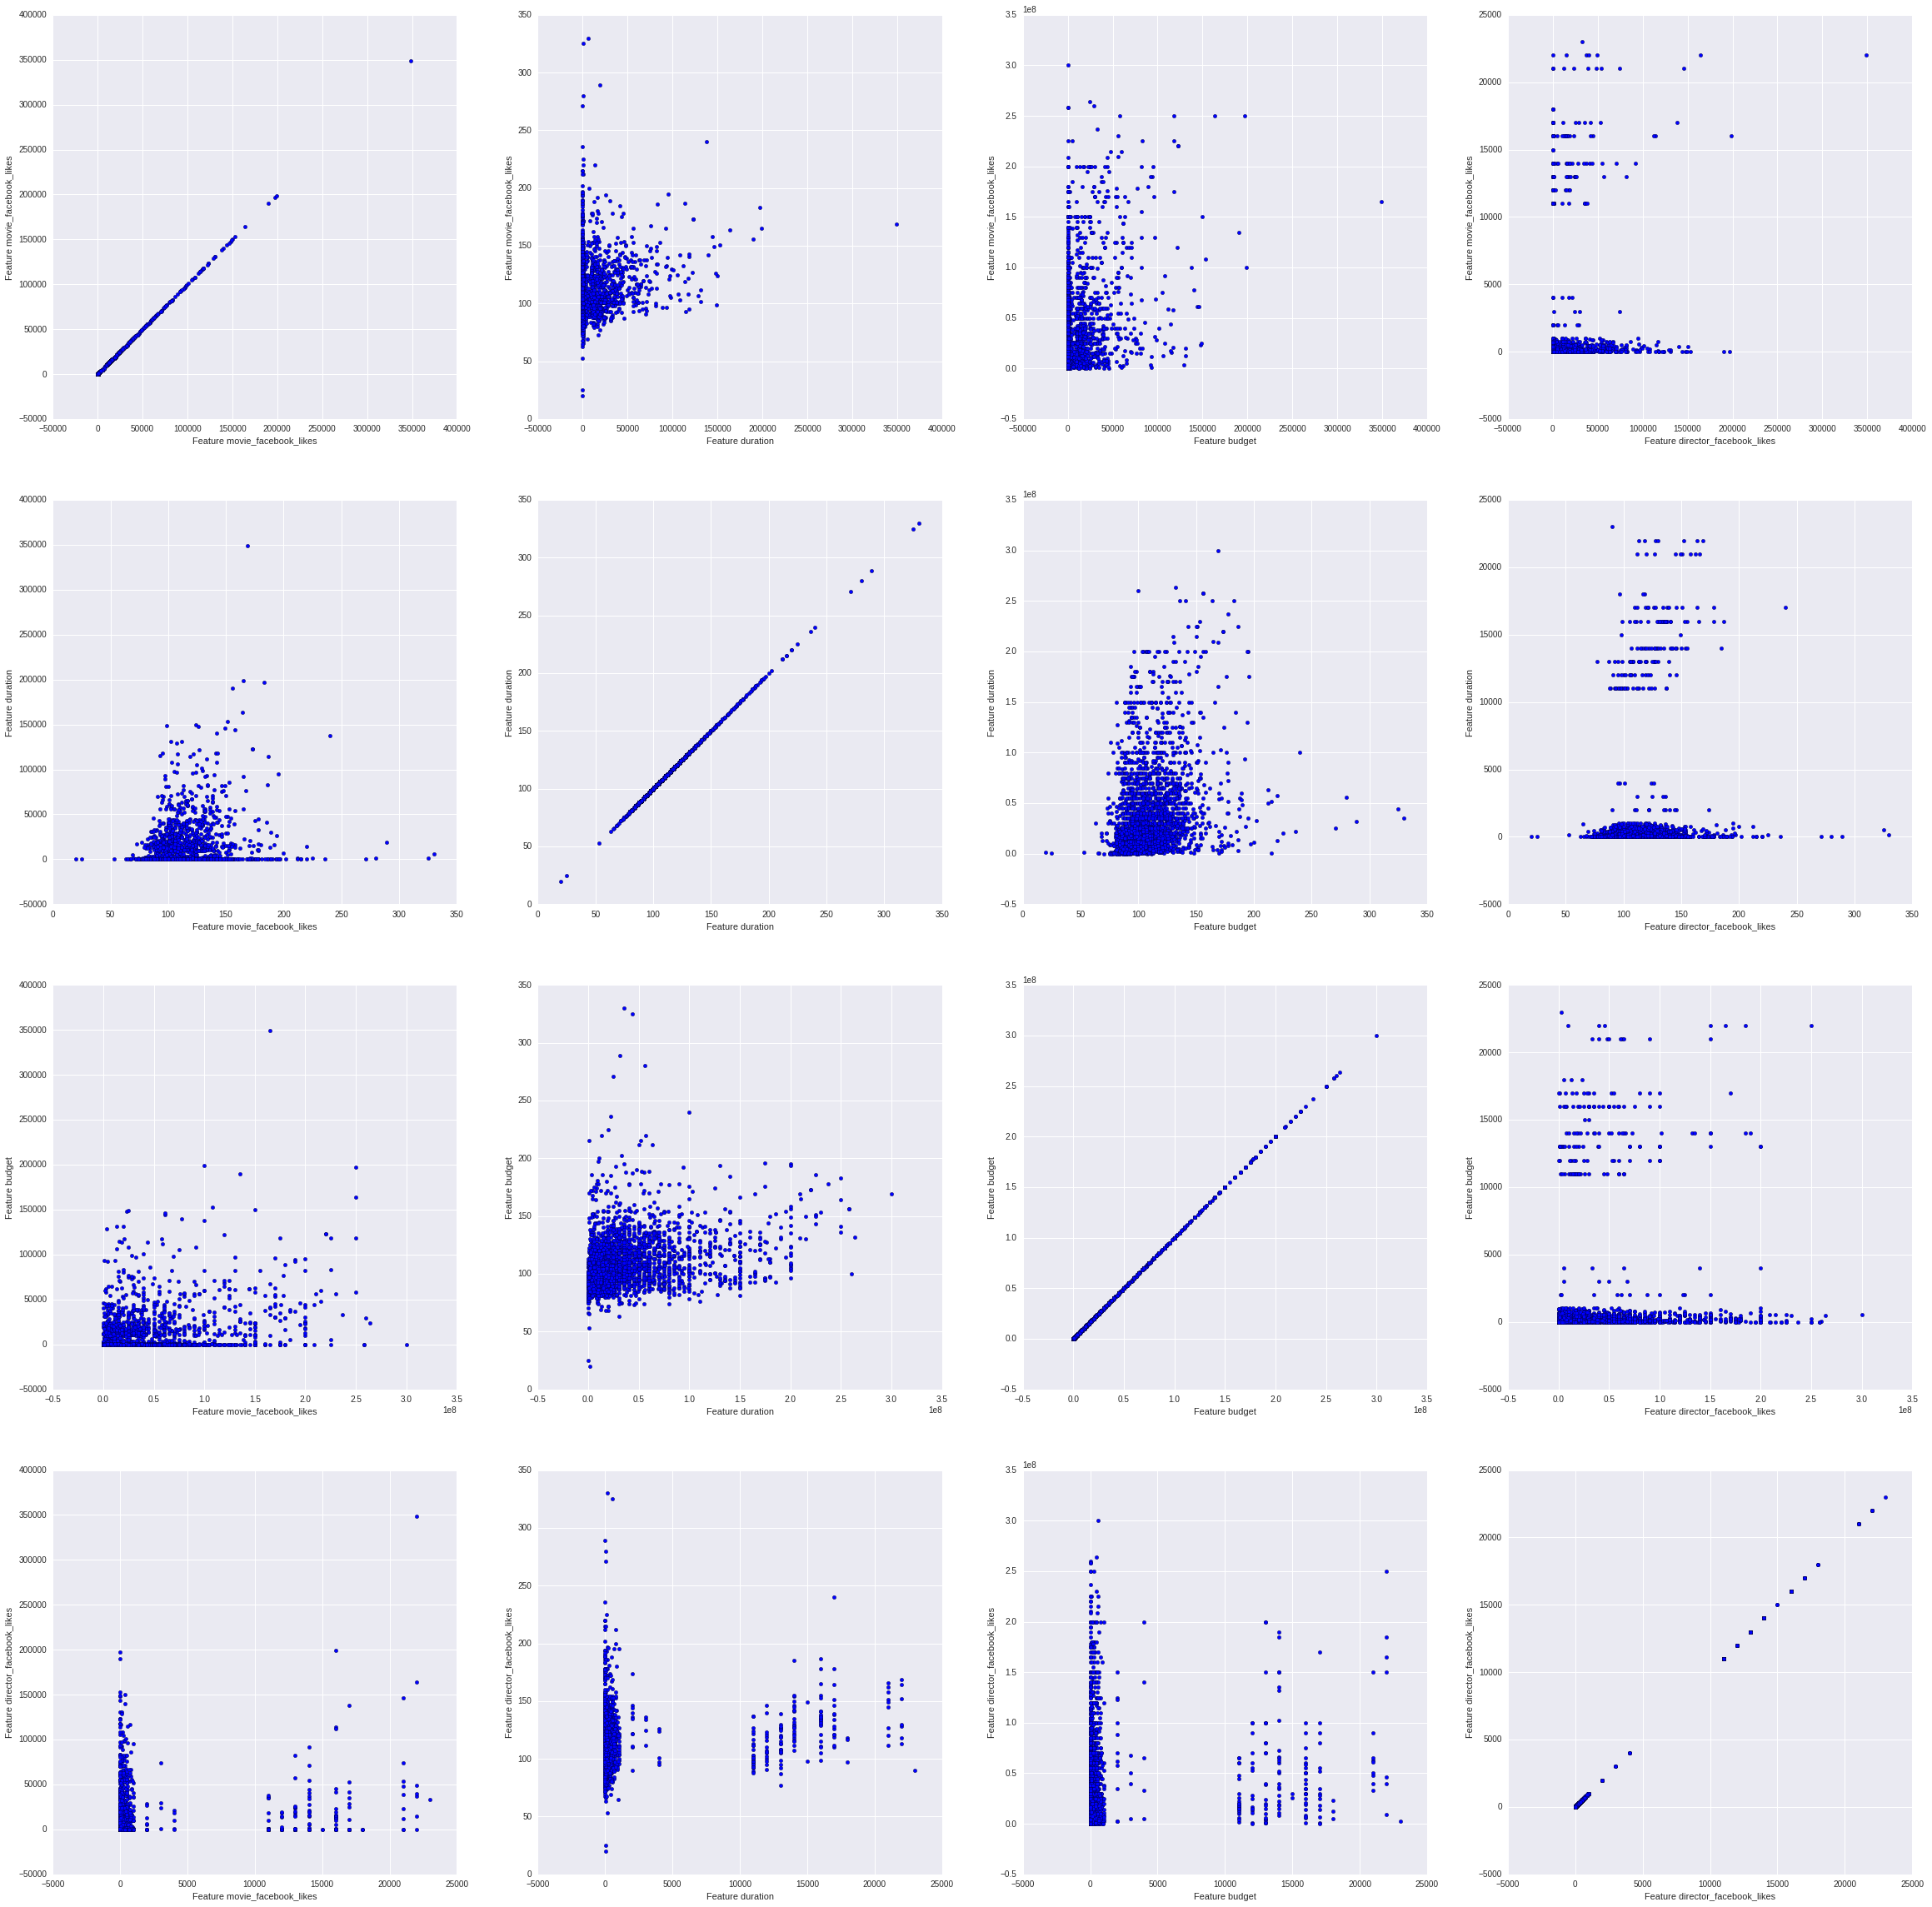

In [152]:
def scatter_matrix(X):
    feature_count = len(X.columns)
    fig,ax = plt.subplots(ncols=feature_count,nrows=feature_count,figsize=(10*feature_count, 10*feature_count))

    for i,feature_i in enumerate(X):
        for j,feature_j in enumerate(X):
            ax[i][j].scatter(X[feature_i],X[feature_j])
            ax[i][j].set_xlabel('Feature ' + str(feature_j))
            ax[i][j].set_ylabel('Feature ' + str(feature_i))

scatter_matrix(X)